<a href="https://colab.research.google.com/github/wingated/cs180_labs/blob/main/data_visualization_lab2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run wget to download data
!wget https://andrewnc.github.io/lady_potty.csv

--2021-01-19 18:20:25--  https://andrewnc.github.io/lady_potty.csv
Resolving andrewnc.github.io (andrewnc.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to andrewnc.github.io (andrewnc.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3255 (3.2K) [text/csv]
Saving to: ‘lady_potty.csv’

lady_potty.csv      100%[===================>]   3.18K  --.-KB/s    in 0s      

2021-01-19 18:20:25 (40.4 MB/s) - ‘lady_potty.csv’ saved [3255/3255]



## Data Visualization

"Always try to get data that's good enough that you don't need to do statistics on it" - Randall Munroe 

https://xkcd.com/2400/

If you have a good visualization, you can draw conclusions from your data without the need for complicated modeling or statistics. 

These types of results improve communcation and are invaluable to modern day data scientists. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.random((100,2))
print(data.shape)

(100, 2)


Numpy shaping works like vector shaping, with the first dimension representing the number of rows, and the second dimension representing the number of columns. 

See https://jalammar.github.io/visual-numpy/ for a nice guide to dimensions and other operations.

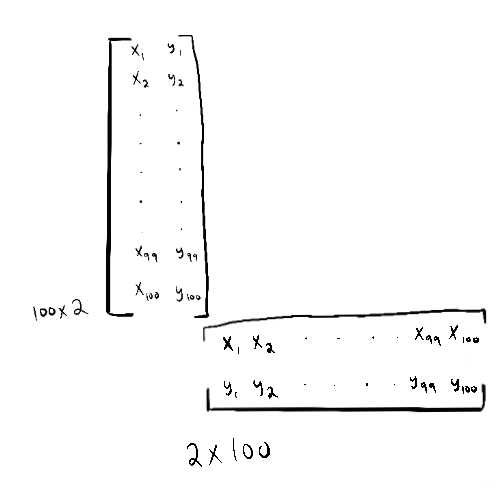

For the data we generated randomly, we can treat the first column as x values and the second column as y values in a scatter plot. 

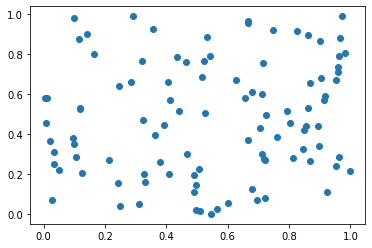

In [ ]:
x = data[:,0] # slicing to get the first column of data
y = data[:,1]

plt.scatter(x,y)
plt.show()

Or we can reverse the order.

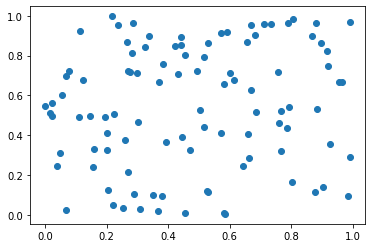

In [ ]:
plt.scatter(y, x)
plt.show()

# Problem 1
Create a scatter plot of a single diagonal line from the top left corner to the bottom right corner. You can use numpy, but it can also be done without using numpy.

We can load various datasets using statsmodels. 

The available data sets are here 

https://github.com/vincentarelbundock/Rdatasets/blob/master/datasets.csv

lines 372 - 455

In [ ]:
import statsmodels.api as sm
import pandas as pd

It wouldn't be an introduction to data science course if we didn't view one of the most iconic datasets in the field. The Iris dataset is a hand collected series of measurments for 3 types of flowers. 

In [ ]:
df = sm.datasets.get_rdataset('iris').data

In [ ]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Pandas has plotting functionality built on top of matplotlib which we can use to plot directly from the dataframe

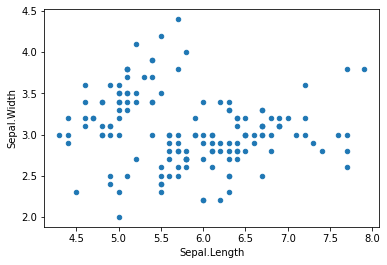

In [ ]:
df.plot(x='Sepal.Length', y='Sepal.Width', kind='scatter')
plt.show()

Python has many amazing plotting libraries such as Seaborn, Matplotlib, and Plotly. 

One skill of a data scientist is to know when to use the proper tool. 

For example, with the plotly library, you can easily color the scatter plots by simply using the categorical Species column. 

In [ ]:
import plotly.express as px
px.scatter(df, x='Sepal.Length', y='Sepal.Width', color='Species')

## Problem 2

Find the best combination (subjective) of columns to display the separation between classes of flower. 

Write a few sentences in a text box explaining your choice.

## YOUR ANSWER HERE

Often times in data science, you want to compare sets of data to one another. For example, you may want to compare how something changes over time. 

One great way to compare these values is with a box plot. The box plot shows you how the data is distributed from the minimal values to the 75% range all the way to the maximal outlier values. 

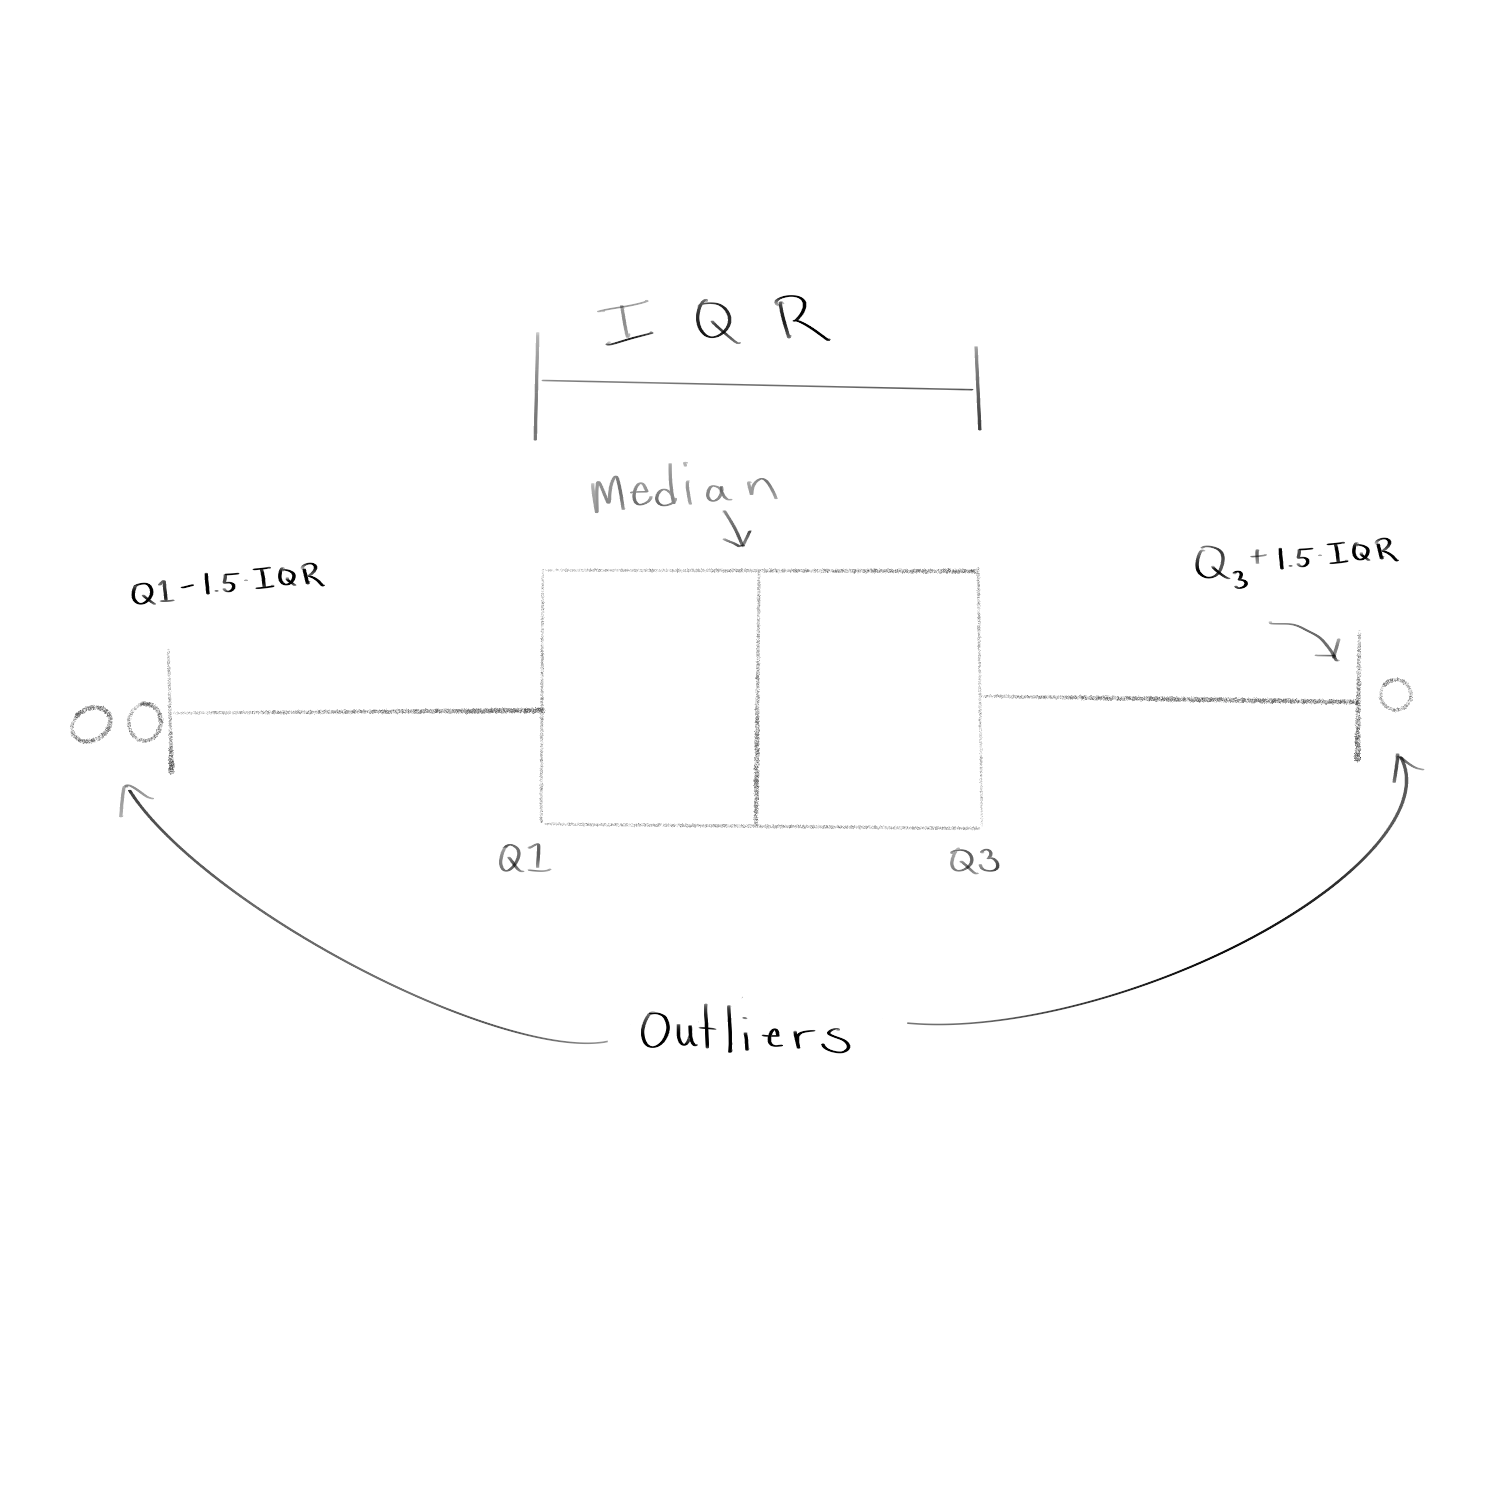

In [ ]:
df = sm.datasets.get_rdataset('nhtemp').data

In [ ]:
df.head()

,time,value
0,1912,49.9
1,1913,52.3
2,1914,49.4
3,1915,51.1
4,1916,49.4


Here we have the average yearly temperature from New Haven Connecticut from around 1910 - 1970. 

A box plot is an excellent way to visualize this data over time. We first need to massage the data into a form with decades as a column. We do this by using the built in `pandas cut` function and choose 6 decades. 

We then can generate a `boxplot` on a certain column. 

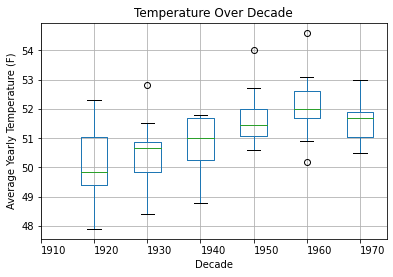

In [ ]:
df['Decade'] = pd.cut(df.time, bins=6)
df[['Decade', 'value']].boxplot(by='Decade')
plt.xticks(range(7), [str(x) for x in range(1910, 1980, 10)])
plt.xticks(ha='left')
plt.suptitle('')
plt.title('Temperature Over Decade')
plt.xlabel('Decade')
plt.ylabel('Average Yearly Temperature (F)')
plt.show()

## Problem 3

Load `lady_potty.csv` into a pandas data frame. It should have been loaded onto your remote Colab computer in the very first line. 

If not, run the following command `!wget https://andrewnc.github.io/lady_potty.csv` to download the data

Once you have the data loaded you can view the column values

In [ ]:
df.head()

,ind,dt,dow,duration,pooped,peed
0,1,2020-05-23 18:55:00.0,sat,2,0,1
1,2,2020-05-23 20:30:00.0,sat,2,1,1
2,3,2020-05-23 21:25:00.0,sat,2,0,1
3,4,2020-05-24 09:38:00.0,sun,1,0,1
4,5,2020-05-24 11:01:00.0,sun,3,1,0


This data comes from my late dog Lady. We recorded her bathroom trips over the course of a few weeks to see if there was a trend to her business. 

It was mostly because she liked to go out multiple times per day, and we wanted to see if there was a better time for us to take her out. 

In [ ]:
# We need the data as a date_time object for the next analysis
df['date_time'] = pd.to_datetime(df.dt)

## Problem 4

Create a box plot for 24 hour periods to visualize the trend of Lady's potty breaks.

Make sure the xticks, xlabel, ylabel, and title are all tidy and well labeled. 

In [ ]:
# HINT when you use pd.cut, you should cut the df.date_time.dt.hour column into 24 bins
# HINT plt.xticks(rotation=45) can be helpful when you have many overlapping values
# HINT much of the code can be used from the temperature box plot example above

## Problem 5

Write what you observe from the boxplot data about my dog's potty behavior

# YOUR ANSWER HERE